In [1]:
import pandas as pd
import numpy as np
import re

# Loading Data 

In [2]:
df=pd.read_csv(r'E:\Internship\Customer-Churn-Prediction-Project\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Gathring Information of Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Descriptive statistics numerical columns
df.describe(exclude='object')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Descriptive statistics categorical columns
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [8]:
# getting no of categories in each catagorical columns
for col in df.columns:
   if df[col].dtype=='object':
      print(f'No of unique values : {df[col].nunique()}')
      print(f'Count values of each class: {df[col].value_counts()}')
      print('='*40)
      print()

No of unique values : 7043
Count values of each class: customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

No of unique values : 2
Count values of each class: gender
Male      3555
Female    3488
Name: count, dtype: int64

No of unique values : 2
Count values of each class: Partner
No     3641
Yes    3402
Name: count, dtype: int64

No of unique values : 2
Count values of each class: Dependents
No     4933
Yes    2110
Name: count, dtype: int64

No of unique values : 2
Count values of each class: PhoneService
Yes    6361
No      682
Name: count, dtype: int64

No of unique values : 3
Count values of each class: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

No of unique values : 3
Count values of each class: InternetService
Fiber optic    3096
DSL 

In [9]:
df.shape

(7043, 21)

In [10]:
df.duplicated().sum()

np.int64(0)

## Observation
1. There are no missing or null values in dataset
2. Only 3 numarical column and 18 categorical columns present


## Data Preprocessing

In [11]:
# converting categotical col to numarical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns:
    if df[col].dtypes=='object':
      df[col]=le.fit_transform(df[col])

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [13]:
# Standadize numarical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reshape the columns into 2D arrays
df['MonthlyCharges'] = scaler.fit_transform(df['MonthlyCharges'].values.reshape(-1, 1))
df['TotalCharges'] = scaler.fit_transform(df['TotalCharges'].values.reshape(-1, 1))

print(df[['MonthlyCharges', 'TotalCharges']])

      MonthlyCharges  TotalCharges
0          -1.160323     -0.398608
1          -0.259629     -0.948762
2          -0.362660     -1.641883
3          -0.746535     -0.983710
4           0.197365     -1.235224
...              ...           ...
7038        0.665992     -0.879397
7039        1.277533      1.292099
7040       -1.168632     -0.139680
7041        0.320338     -0.316534
7042        1.358961      1.138013

[7043 rows x 2 columns]


In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.398608,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.948762,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-1.641883,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.983710,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.235224,1


In [15]:
df.drop('customerID',axis=1,inplace=True)

# Feature Selation

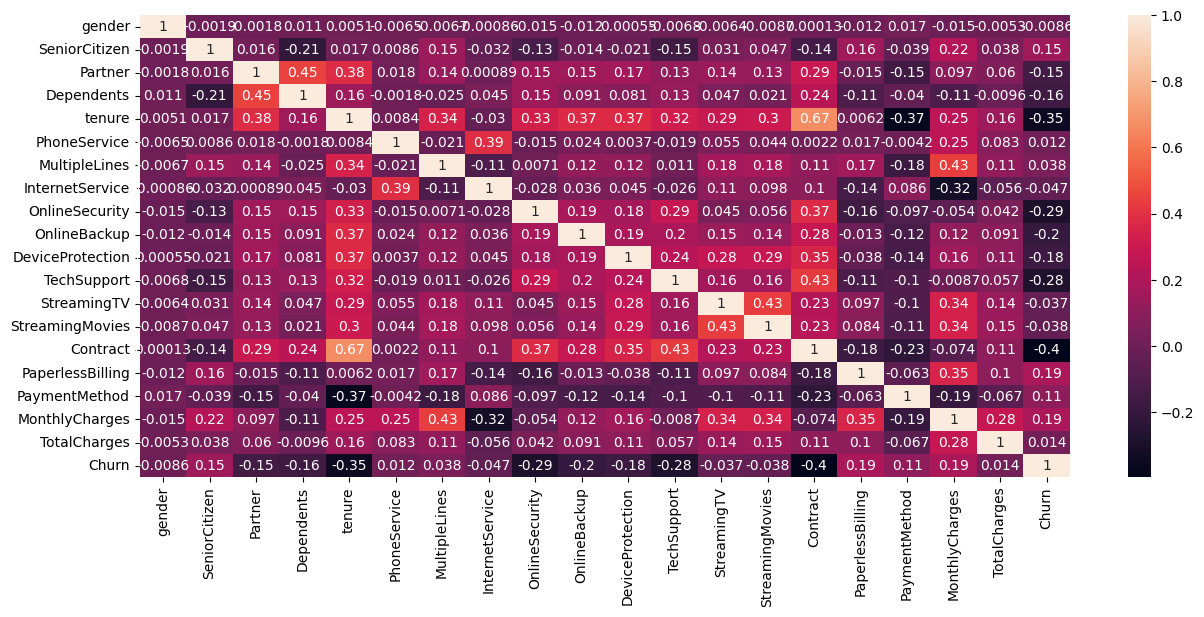

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df['Churn']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape,X_test.shape

((5634, 19), (1409, 19))

# Model Building and Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [30]:
models={
    'LogisticRegression': LogisticRegression(penalty='l2',solver='lbfgs'),
    'Tree' :DecisionTreeClassifier(criterion='log_loss'),
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy'),
    'XGBClassifier': XGBClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'KNN Classifier': KNeighborsClassifier()
}

In [31]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_curve, auc,accuracy_score
import matplotlib.pyplot as plt

# Train and evaluate each model
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Evaluate the model using classification metrics
  print(f"Results for {name}:")
  print(classification_report(y_test, y_pred))

  # Additional metrics 
  accuracy=accuracy_score(y_test,y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")

  # ROC Curve (optional)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc_score = auc(fpr, tpr)

  print(f"AUC: {auc_score:.4f}")  # Print AUC score within the loop


  print("-" * 30)  # Print a separator for better readability


Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Accuracy: 0.8169
Precision: 0.8090
Recall: 0.8169
F1-Score: 0.8106
AUC: 0.7357
------------------------------
Results for Tree:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1036
           1       0.46      0.50      0.48       373

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.71      1409

Accuracy: 0.7111
Precision: 0.7190
Recall: 0.7111
F1-Score: 0.7147
AUC: 0.6423
------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-sc

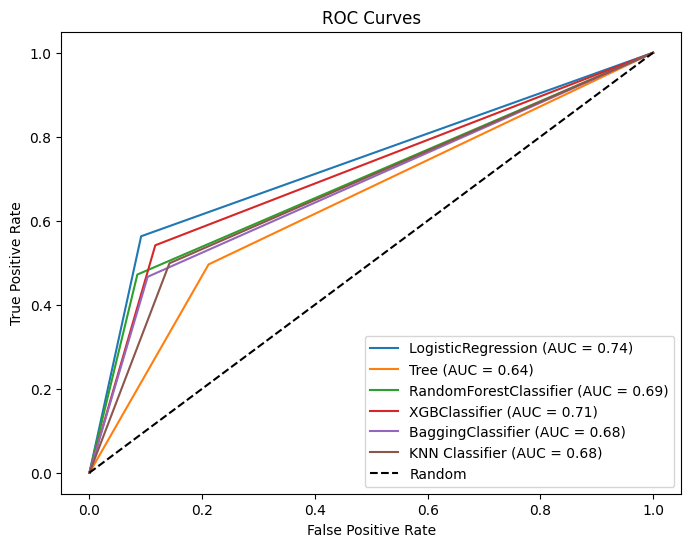

In [32]:
# Consider plotting ROC curves in a separate loop or function
def plot_roc_curves(models, X_test, y_test):
  plt.figure(figsize=(8, 6))
  for name, model in models.items():
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
  plt.plot([0, 1], [0, 1], 'k--', label='Random')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curves')
  plt.legend(loc='lower right')
  plt.show()

# Call the ROC plotting function after the loop
plot_roc_curves(models, X_test, y_test)

# Hyperparmeter Tuning

In [39]:
for name, model in models.items():
    get_parms={}
    print(f"Hyperparameters for {name}:\n")
    for key, value in model.get_params().items():
        print(f"{key}: {value}")
    print("\n" + "-"*50 + "\n")

Hyperparameters for LogisticRegression:

C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: deprecated
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False

--------------------------------------------------

Hyperparameters for Tree:

ccp_alpha: 0.0
class_weight: None
criterion: log_loss
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: None
splitter: best

--------------------------------------------------

Hyperparameters for RandomForestClassifier:

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: N

In [42]:
models={
    'LogisticRegression': LogisticRegression(penalty='l2',solver='lbfgs'),
    'Tree' :DecisionTreeClassifier(criterion='log_loss'),
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy'),
   #  'XGBClassifier': XGBClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'KNN Classifier': KNeighborsClassifier()
}

In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grids = {
	'LogisticRegression': {
		'penalty': ['l1', 'l2'],
		'C': [0.01, 0.1, 1, 10, 100],
		'solver': ['liblinear']
	},
	'Tree': {
		'criterion': ['gini', 'entropy'],
		'max_depth': [None, 10, 20, 30, 40, 50],
		'min_samples_split': [2, 5, 10]
	},
	'RandomForestClassifier': {
		'n_estimators': [50, 100, 200],
		'criterion': ['gini', 'entropy'],
		'max_depth': [None, 10, 20, 30],
		'min_samples_split': [2, 5, 10]
	},
	# 'XGBClassifier': {
	# 	'n_estimators': [50, 100, 200],
	# 	# 'learning_rate': [0.01, 0.1, 0.2],
	# 	# 'max_depth': [3, 5, 7]
	# },
	'BaggingClassifier': {
		'n_estimators': [10, 50, 100],
		'max_samples': [0.5, 1.0],
		'max_features': [0.5, 1.0]
	},
	'KNN Classifier': {
		'n_neighbors': [3, 5, 7, 9],
		'weights': ['uniform', 'distance'],
		'metric': ['euclidean', 'manhattan']
	}
}

# Perform GridSearchCV for each model
best_models = {}
for name, model in models.items():
	print(f"Tuning hyperparameters for {name}...")
	grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
	grid_search.fit(X_train, y_train)
	best_models[name] = grid_search.best_estimator_
	accuracy=accuracy_score(y_test,y_pred)
	precision = precision_score(y_test, y_pred, average='weighted')
	recall = recall_score(y_test, y_pred, average='weighted')
	f1 = f1_score(y_test, y_pred, average='weighted')
	print(f"Accuracy: {accuracy:.4f}")
	print(f"Precision: {precision:.4f}")
	print(f"Recall: {recall:.4f}")
	print(f"F1-Score: {f1:.4f}")
	print(f"Best parameters for {name}: {grid_search.best_params_}")
	print(f"Best score for {name}: {grid_search.best_score_:.4f}")
	print("\n" + "-"*50 + "\n")

Tuning hyperparameters for LogisticRegression...
Accuracy: 0.7630
Precision: 0.7554
Recall: 0.7630
F1-Score: 0.7585
Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for LogisticRegression: 0.8009

--------------------------------------------------

Tuning hyperparameters for Tree...
Accuracy: 0.7630
Precision: 0.7554
Recall: 0.7630
F1-Score: 0.7585
Best parameters for Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best score for Tree: 0.7643

--------------------------------------------------

Tuning hyperparameters for RandomForestClassifier...
Accuracy: 0.7630
Precision: 0.7554
Recall: 0.7630
F1-Score: 0.7585
Best parameters for RandomForestClassifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.8014

--------------------------------------------------

Tuning hyperparameters for BaggingClassifier...
Accuracy: 0.7630
Precisi

In [46]:
params={'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
lr=LogisticRegression(**params)

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8162
Precision: 0.8083
Recall: 0.8162
F1-Score: 0.8100


In [56]:
import pickle
import os

file_path = r'model\model.pkl'

# Ensure directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save model using pickle
with open(file_path, 'wb') as f:  # Use 'wb' for writing binary data
    pickle.dump(lr, f)
